In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data

In [44]:
df =pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Exploratory Data Analysis

#### Check out the Missing Data

<AxesSubplot:>

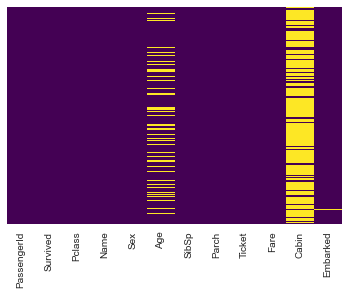

In [46]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='viridis')

In [47]:
# Number of missing values
missing_Age = df.isnull().sum().loc['Age']
comp_Age = df['Age'].count()
total_rows = missing_Age + comp_Age
print(round((missing_Age/total_rows)*100,2),'% of missing values in Age column')

missing_Cab = df.isnull().sum().loc['Cabin']
comp_Cab = df['Cabin'].count()
Cab_total_rows = missing_Cab + comp_Cab
print(round((missing_Cab/Cab_total_rows)*100,2),'% of missing values in Age column')

missing_em = df.isnull().sum().loc['Embarked']
comp_em = df['Embarked'].count()
em_total_rows = missing_em + comp_em
print(round((missing_em/em_total_rows)*100,2),'% of missing values in Age column')


19.87 % of missing values in Age column
77.1 % of missing values in Age column
0.22 % of missing values in Age column


In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Countplot for Survived column

<AxesSubplot:xlabel='Survived', ylabel='count'>

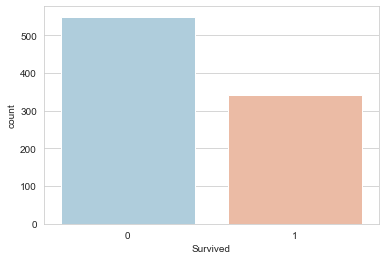

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data =df, palette='RdBu_r')

In [50]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 549 people lost their lives while 342 people survived.

### Let us analyze how many male and female survived or lost their lives

<AxesSubplot:xlabel='Survived', ylabel='count'>

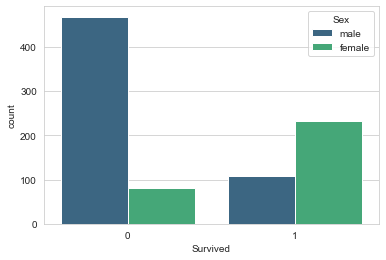

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data =df, palette='viridis', hue='Sex')

#### More male passengers have lost their lives than female passengers

<AxesSubplot:xlabel='Survived', ylabel='count'>

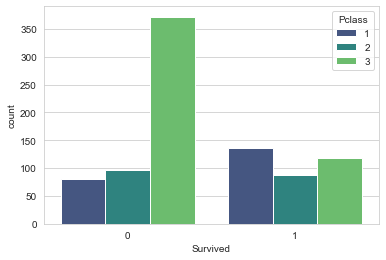

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data =df, palette='viridis', hue='Pclass')

#### More than 350 passengers from Third class lost their lives than any other class. 

### Age Distribution

C:\Users\Ranganath ShankarRao\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

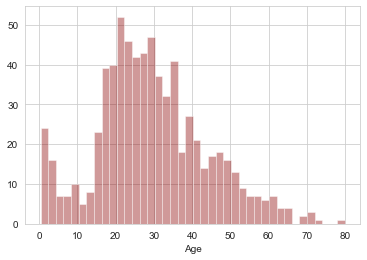

In [53]:
sns.distplot(df['Age'].dropna(), kde =False, bins =40, color='darkred')

<AxesSubplot:ylabel='Frequency'>

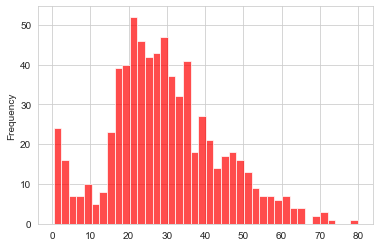

In [54]:
df['Age'].dropna().plot(kind ='hist', color ='red', bins =40, alpha =0.7)

#### From this age distribution plot we can say that age group is concentrated between 20 to 37

### Let us visualize the Sibling/Spouse count

<AxesSubplot:xlabel='SibSp', ylabel='count'>

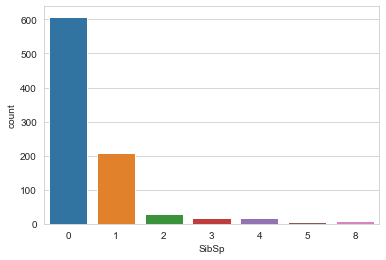

In [55]:
sns.countplot(x='SibSp', data =df)

In [56]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

#### 608 people were single and 209 people had 1 sibling or spouse 

### Using Cufflinks for interactive visualization

In [57]:
import cufflinks as cf
cf.go_offline()

In [58]:
df['Fare'].iplot(kind ='hist', color ='green', bins =30)

### Data Cleaning

We want to fill in the missing values in Age column instead of just dropping the missing rows. We can impute the values based on mean age but we can also impute the age according to the Passenger Class they belong to.

In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Boxplot of Age vs Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

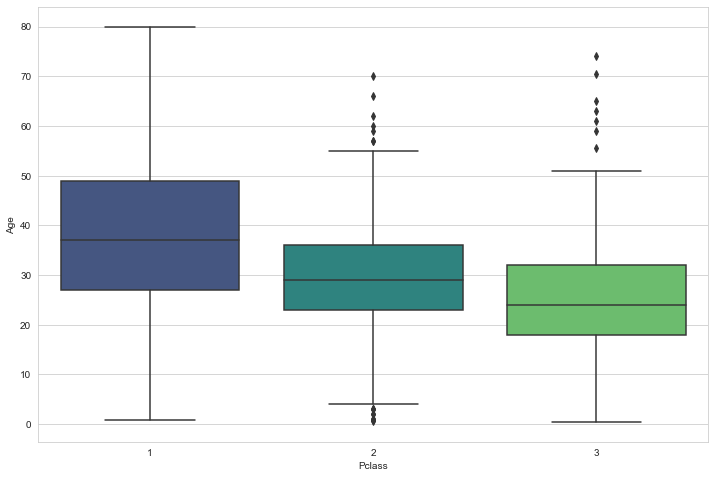

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y ='Age', data =df, palette='viridis')

From this boxplot we can say that the average age of a 1st class passenger is 37, 2nd class passenger is 29 and 3rd class passenger is 24

#### Define a function to impute age based on Passenger class

In [61]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [62]:
df['Age'] =df[['Age','Pclass']].apply(impute_age, axis=1)

Now let us check the heatmap again

<AxesSubplot:>

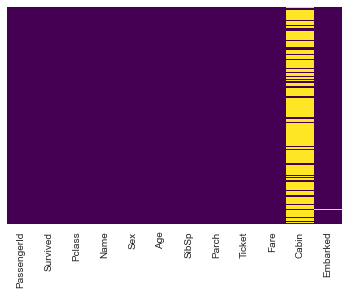

In [63]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap='viridis')

There are no missing values in the Age column. The Cabin column has 77% of the values missing and just 2 rows are missing in Emabrked column. We can go ahead and drop the cabin column as it has less meaning and drop the two rows of embarked.

In [64]:
df.drop('Cabin', axis =1, inplace =True)

In [65]:
df.dropna(inplace =True)

<AxesSubplot:>

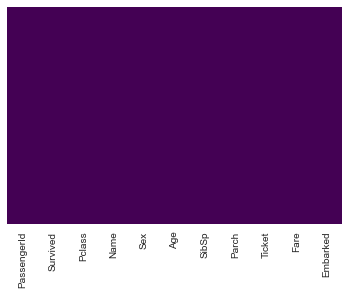

In [66]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap='viridis')

We have handled all the missing values in the dataset.

### Coverting categorical features

We will need to convert categorical features to dummy variables using pandas! otherwise the machine learning algorithm  won't be able to directly  take in those features as inputs.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [68]:
df.dtypes.value_counts()

int64      5
object     4
float64    2
dtype: int64

There are 5 int columns 4 object columns and 2 float columns

In [69]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [70]:
embark =pd.get_dummies(df['Embarked'], drop_first=True)

We have to drop the first columns after we do categorical encoding. Otherwise it will lead to multi-colinearity problem where a bunch of fields will become predictors for others. 

We can drop the Sex, Embarked, Name and tIcket columns

In [71]:
df.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [72]:
df = pd.concat([ df,sex, embark], axis=1)

In [73]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


We can go ahead and drop PassengerId column as well as it is just a index number

In [74]:
df.drop('PassengerId', axis =1, inplace=True)

In [75]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Great our data is ready for modeling

### Prepare the Test data - Repeat the same steps what you did for training data

In [77]:
test_df = pd.read_csv('titanic_test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:>

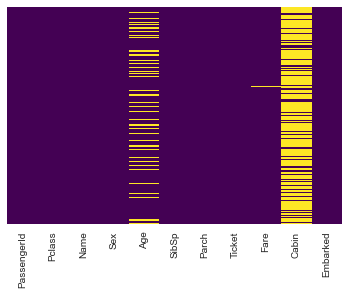

In [79]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [84]:
total_rows = 417
print(round((test_df.isnull().sum()/total_rows)*100))

PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            21.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          78.0
Embarked        0.0
dtype: float64


21% values in the age column are missing and 78% values are missing in Cabin column.

### Boxplot of Age vs Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

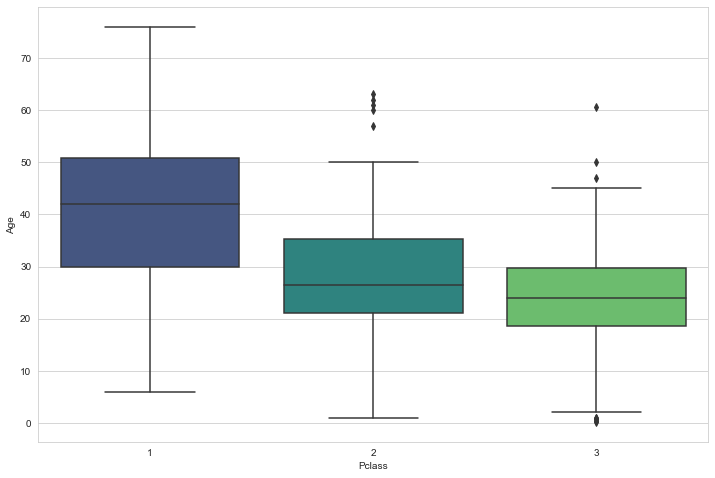

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data = test_df, palette='viridis')

From this boxplot we can say that the average age of a 1st class passenger is 42, 2nd class passenger is 27 and 3rd class passenger is 25

### Define a function to impute age based on Passenger class

In [88]:
def impute_test_age(cols):
    Age =cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 42
        elif Pclass ==2:
            return 27
        elif Pclass == 3:
            return 25
    else:
        return Age

In [89]:
test_df['Age'] = test_df[['Age', 'Pclass']].apply(impute_test_age, axis=1)

<AxesSubplot:>

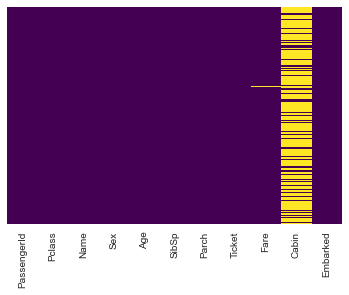

In [90]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
test_df.drop('Cabin', axis =1, inplace= True)

In [93]:
test_df.dropna(inplace=True)

<AxesSubplot:>

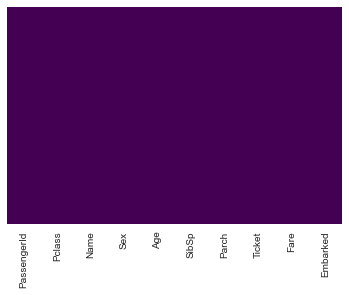

In [94]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We have handled all the missing values and dropped the Cabin column and missing rows in Fare column

### Categorical encoding

In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [100]:
sex =pd.get_dummies(test_df['Sex'], drop_first=True)

In [101]:
embark = pd.get_dummies(test_df['Embarked'], drop_first=True)

In [102]:
test_df.drop(['Name','Sex','Ticket','Embarked'], axis =1, inplace =True)

In [104]:
test_df = pd.concat([test_df, sex, embark], axis=1)

In [106]:
test_df.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
413,1305,3,25.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,25.0,0,0,8.0500,1,0,1
417,1309,3,25.0,1,1,22.3583,1,0,0


In [107]:
test_df.drop('PassengerId', axis=1, inplace=True)

In [108]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    417 non-null    uint8  
 6   Q       417 non-null    uint8  
 7   S       417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


In [109]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


### Build a Logistic Regression Model

In [110]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=101)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lgm = LogisticRegression()

#### Train the Logistic Regression Model on Training data

In [116]:
lgm.fit(X_train,y_train)

C:\Users\Ranganath ShankarRao\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [117]:
train_pred = lgm.predict(X_val)

In [118]:
train_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [120]:
print(classification_report(y_val,train_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       174
           1       0.83      0.68      0.74       120

    accuracy                           0.81       294
   macro avg       0.81      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [121]:
print(confusion_matrix(y_val,train_pred))

[[157  17]
 [ 39  81]]


In [127]:
print('Validation Accuracy is',round((accuracy_score(y_val,train_pred)*100),2),'%')

Validation Accuracy is 80.95 %


### Test Predictions

In [129]:
test_pred = lgm.predict(test_df)

In [130]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,